<strong><h1>Preâmbulo</h1></strong>

In [8]:
import Pkg
using Pkg
Pkg.add("StatsPlots")
Pkg.add("CSV")
Pkg.add("DataFrames")
using StatsPlots
using CSV
using DataFrames

<strong><h1>Mandelbrot - Sequencial</h1></strong>
Texto pode ser digitado aqui

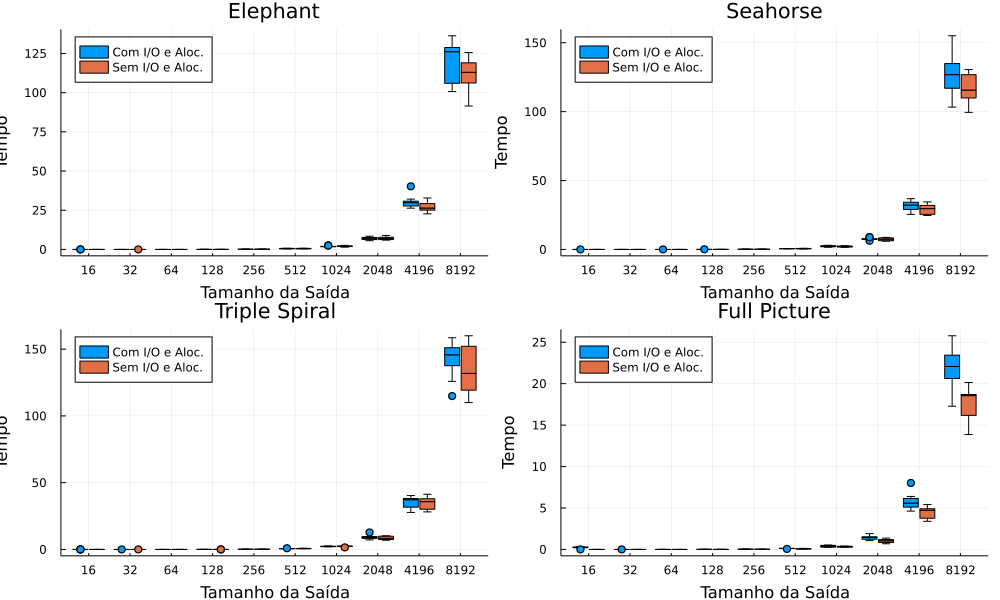

In [37]:
dataIoPaths = [ "../tests/seq/with-IO-Aloc/elephant.csv",
                "../tests/seq/with-IO-Aloc/seahorse.csv",
                "../tests/seq/with-IO-Aloc/triple_spiral.csv",
                "../tests/seq/with-IO-Aloc/full.csv"]
dataNoIoPaths = [ "../tests/seq/no-IO-Aloc/elephant.csv",
                "../tests/seq/no-IO-Aloc/seahorse.csv",
                "../tests/seq/no-IO-Aloc/triple_spiral.csv",
                "../tests/seq/no-IO-Aloc/full.csv"]
titles = ["Elephant" "Seahorse" "Triple Spiral" "Full Picture"]

x = repeat(["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"], outer=20)
p = []

for i in 1:4
    v = []
    w = []
    dataIO = CSV.read(dataIoPaths[i], DataFrame)
    dataNoIO = CSV.read(dataNoIoPaths[i], DataFrame)
    
    for row in eachrow(dataIO)
        v = [v;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
    end
    
    for row in eachrow(dataNoIO)
        w = [w;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
    end
    y = [v;vec(w)]

    push!(p, groupedboxplot(x, y, bar_width = 0.8,
                    group = repeat(["Com I/O e Aloc.", "Sem I/O e Aloc."], inner = 100),
                    xlabel = "Tamanho da Saída", ylabel="Tempo", legend=:topleft))
end
plot(p[1], p[2], p[3], p[4], title = titles, layout = (2,2))
plot!(size=(1000,600))

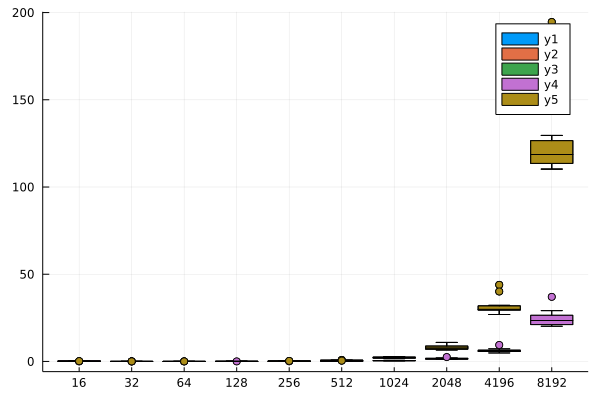

In [180]:
x = ["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"]
groupedboxplot!(x, v, bar_width = 0.8)
groupedboxplot!(x, w, bar_width = 0.8)